# Analysis of Tecan plate reader data 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy import log, exp
import pandas as pd
from lmfit import Model
import seaborn as sns
sns.set_style('ticks')
context = 'paper'
sns.set_context(context, font_scale=2)

In [4]:
import curveball

In [5]:
filename = r"D:\Dropbox\ex silico\tecan\Yoav_040515_7_strains.xlsx"

C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:5: SettingWithCopyWarning: 
A v

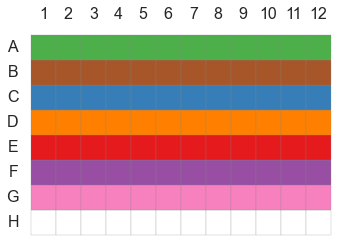

In [6]:
plate = pd.read_csv(r"d:/dropbox/ex silico/tecan/plate_Yoav_040515_7_strains.csv")
plate.Strain[plate.Strain=='12s'] = 'DH12S'
plate.Strain[plate.Strain=='DH5alfa'] = 'DH5a'
plate.Color[plate.Strain=='DH12S'] = '#984ea3'
plate.Color[plate.Strain=='17s'] = '#e41a1c'

fig,ax = curveball.plots.plot_plate(plate)

In [7]:
print filename
#df = curveball.ioutils.read_tecan_mat(filename, max_time=max_time, plate=plate)
df = curveball.ioutils.read_tecan_xlsx(filename, 'OD', max_time=24, plate=plate)
print df.shape
df.head()

D:\Dropbox\ex silico\tecan\Yoav_040515_7_strains.xlsx
(11328, 9)


,Time,Temp. [°C],Cycle Nr.,Well,OD,Row,Col,Color,Strain
0,0.000000,24.5,1,A1,0.1470,A,1,#4daf4a,DH5a
1,0.187917,30.2,2,A1,0.1455,A,1,#4daf4a,DH5a
2,0.375861,30.0,3,A1,0.1454,A,1,#4daf4a,DH5a
3,0.563778,29.9,4,A1,0.1467,A,1,#4daf4a,DH5a
4,0.751722,30.1,5,A1,0.1476,A,1,#4daf4a,DH5a


['#4daf4a' '#a65628' '#377eb8' '#ff7f00' '#e41a1c' '#984ea3' '#f781bf' '#ffffff']
['DH5a' 'TG1' 'XL1Blue' 'MG1655' '17s' 'DH12S' 'BL21' 'blank']


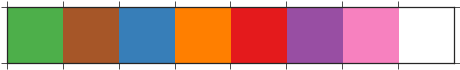

In [8]:
sns.palplot(df.Color.unique())
print df.Color.unique()
print df.Strain.unique()

In [9]:
#df = df[(df.Strain=='DH5a') | (df.Strain=='TG1') | (df.Strain=='DH12S') ]

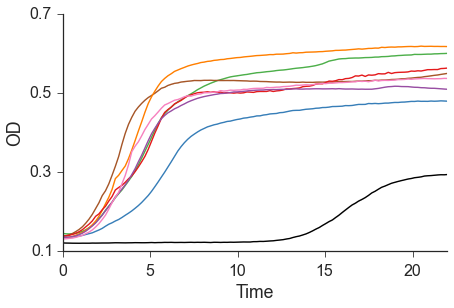

In [10]:
g = curveball.plots.tsplot(df, ci_level=0)
g.get_legend().set_visible(False)
#plt.legend(loc='upper left')
plt.yticks([0.1,0.3,0.5,0.7])
fig = g.get_figure()
fig.tight_layout()
fig.savefig('tsplot_%s.png' % context, bbox_inches='tight')

In [11]:
#curveball.plots.plot_wells(df)

In [12]:
loser = 'DH12S'
winner = 'MG1655'
df = df[df.Time < 12]

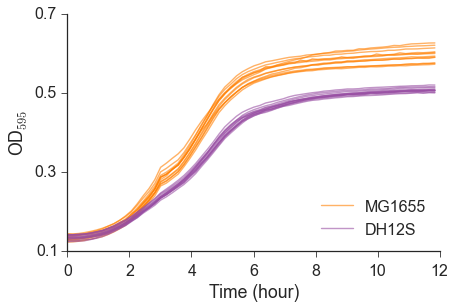

In [13]:
def plot_growth_curves(ax=None):
    if ax is None:
        fig,ax = plt.subplots(1,1)
    else:
        fig = ax.get_figure()
        
    for well in df[(df.Strain == loser) | (df.Strain == winner)].Well.unique():
        df_well = df[df.Well == well]
        color = df_well.Color.unique()[0]        
        ax.plot(df_well.Time, df_well.OD, color=color, alpha=0.6)

    ax.set_xlabel('Time (hour)')
    ax.set_ylabel('OD$_{595}$')    
    ax.set_yticks([0.1,0.3,0.5,0.7])
    ax.get_lines()[0].set_label(winner)
    ax.get_lines()[-1].set_label(loser)
    lg = ax.legend(loc='lower right')
    #lg.set_title('Strain', {'size':14})
    sns.despine()
    fig.tight_layout()
    return fig,ax
fig,ax = plot_growth_curves()
fig.savefig('all_curves_%s.png' % context, bbox_inches='tight')

# Model fitting

[[Model]]
    Model(baranyi_roberts_function)
[[Fit Statistics]]
    # function evals   = 88
    # data points      = 64
    # variables        = 5
    chi-square         = 25.259
    reduced chi-square = 0.428
[[Variables]]
    y0:   0.13002092 +/- 0.001887 (1.45%) (init= 0.1348417)
    r:    0.87647717 +/- 0.048098 (5.49%) (init= 0.3219743)
    K:    0.50565186 +/- 0.001076 (0.21%) (init= 0.5087)
    nu:   1 (fixed)
    q0:   0.15022083 +/- 0.016068 (10.70%) (init= 0.0001)
    v:    0.77205310 +/- 0.081086 (10.50%) (init= 1)

Model(baranyi_roberts_function) 5
Model(logistic_function) 3
Model(richards_function) 4
Model(baranyi_roberts_function) 6


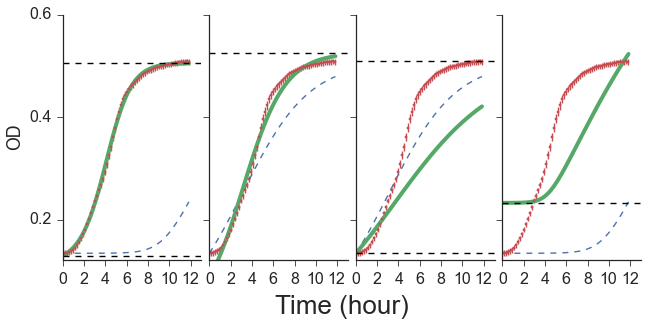

In [14]:
loser_models,fig,ax = curveball.models.fit_model(df[df.Strain == loser], param_guess={'q0':0.0001})
plt.setp(ax, title='')
#plt.setp(ax, xticks=[0,6,12])
plt.setp(ax, yticks=[0.2,0.4,0.6])
plt.setp(ax, xlabel='')
fig.text(0.4, -0.1, 'Time (hour)', fontsize=26)
fig.tight_layout()
fig.set_figwidth(8.6)
fig.set_figheight(5.9*2/3.)
fig.savefig("loser_models.png", bbox_inches='tight')
for m in loser_models:
    print m.model.name, m.nvarys

[[Model]]
    Model(baranyi_roberts_function)
[[Fit Statistics]]
    # function evals   = 70
    # data points      = 64
    # variables        = 5
    chi-square         = 11.060
    reduced chi-square = 0.187
[[Variables]]
    y0:   0.13100569 +/- 0.001509 (1.15%) (init= 0.13405)
    r:    0.93155863 +/- 0.039145 (4.20%) (init= 0.4434438)
    K:    0.59057262 +/- 0.001667 (0.28%) (init= 0.5973583)
    nu:   1 (fixed)
    q0:   0.10041645 +/- 0.013576 (13.52%) (init= 0.0001)
    v:    1.11460690 +/- 0.103007 (9.24%) (init= 1)

Model(baranyi_roberts_function) 5
Model(baranyi_roberts_function) 6
Model(logistic_function) 3
Model(richards_function) 4


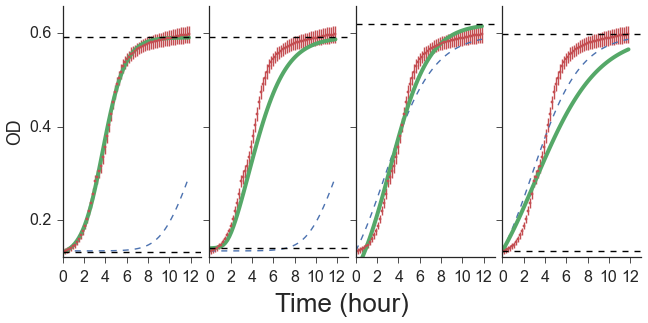

In [15]:
winner_models,fig,ax = curveball.models.fit_model(df[df.Strain == winner], param_guess={'q0':0.0001})
plt.setp(ax, title='')
#plt.setp(ax, xticks=[0,20,40])
plt.setp(ax, yticks=[0.2,0.4,0.6])
plt.setp(ax, xlabel='')
fig.text(0.4, -0.1, 'Time (hour)', fontsize=26)
fig.tight_layout()
fig.set_figwidth(8.6)
fig.set_figheight(5.9*2/3.)
fig.savefig("winner_models.png", bbox_inches='tight')
for m in winner_models:
    print m.model.name, m.nvarys

In [16]:
print loser
print loser_models[0].best_values
print "Lag duration:", curveball.models.find_lag(loser_models[0], PLOT=False)
print "Max growth rate:", curveball.models.find_max_growth(loser_models[0], PLOT=False)[-1]

print winner
print winner_models[0].best_values
print "Lag duration:", curveball.models.find_lag(winner_models[0], PLOT=False)
print "Max growth rate:", curveball.models.find_max_growth(winner_models[0], PLOT=False)[-1]

DH12S
{'q0': 0.15022083264005864, 'K': 0.50565186704703313, 'r': 0.87647717741681697, 'v': 0.77205310635093016, 'y0': 0.13002092529403098, 'nu': 1}
Lag duration: 1.69119527432
Max growth rate: 0.279310520252
MG1655
{'q0': 0.1004164587910473, 'K': 0.59057262781247299, 'r': 0.93155863318866494, 'v': 1.1146069050176426, 'y0': 0.13100569493377878, 'nu': 1}
Lag duration: 1.7108128333
Max growth rate: 0.362621031619


In [17]:
loser_color = plate.Color[plate.Strain == loser].unique()[0]
winner_color = plate.Color[plate.Strain == winner].unique()[0]

In [18]:
loser_m = loser_models[0]
winner_m = winner_models[0]

In [19]:
len(loser_m.userkws['t']), len(loser_m.best_fit),len(df.Time.unique())

(50, 64, 64)

In [20]:
loser_m.userkws['t']

array([  1.   ,   1.49 ,   1.98 ,   2.469,   2.959,   3.449,   3.939,   4.429,
         4.918,   5.408,   5.898,   6.388,   6.878,   7.367,   7.857,   8.347,
         8.837,   9.327,   9.816,  10.306,  10.796,  11.286,  11.776,  12.265,
        12.755,  13.245,  13.735,  14.224,  14.714,  15.204,  15.694,  16.184,
        16.673,  17.163,  17.653,  18.143,  18.633,  19.122,  19.612,  20.102,
        20.592,  21.082,  21.571,  22.061,  22.551,  23.041,  23.531,  24.02 ,
        24.51 ,  25.   ])

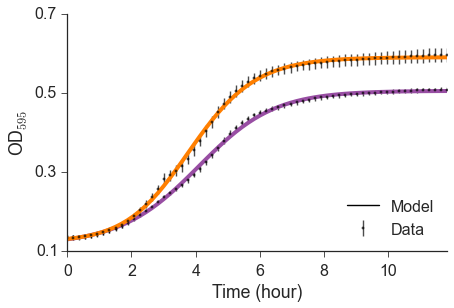

In [21]:
def plot_fit(ax=None):
    if ax is None:
        fig,ax = plt.subplots(1, 1)
    else:
        fig = ax.get_figure()
        
    ax.plot([-1],[0], color='k', label='Model')
    ax.plot(df.Time.unique(), loser_m.best_fit, color=loser_color, lw=4)
    ax.errorbar(df.Time.unique(), loser_m.data, 1./loser_m.weights, color='k', ls='', marker='.', label='Data', alpha=0.7)
    ax.plot(df.Time.unique(), winner_m.best_fit, color=winner_color, lw=4)
    ax.errorbar(df.Time.unique(), winner_m.data, 1./winner_m.weights, color='k', ls='', marker='.', alpha=0.7)

    ax.set_xlim(0,df.Time.max())
    ax.set_xticks([0,2,4,6,8,10])
    ax.legend(loc='lower right')    
    ax.set_ylabel('OD$_{595}$')    
    ax.set_xlabel('Time (hour)')
    ax.set_title('')
    ax.set_yticks([0.1,0.3,0.5,0.7])
    ax.set_ylim(0.1,0.7)
    sns.despine()
    fig.tight_layout()
    return fig,ax
fig,ax = plot_fit()
fig.savefig('model_fits_%s.png' % context, bbox_inches='tight')

# Competition simulation

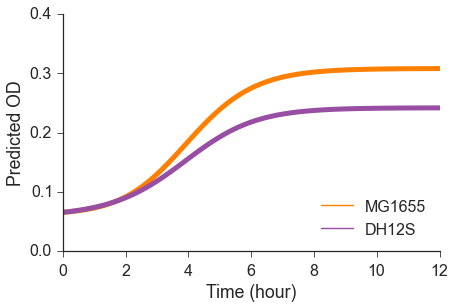

In [23]:
def plot_competition(ax=None):
    if ax is None:
        fig,ax = plt.subplots(1, 1)
    else:
        fig = ax.get_figure()
        
    t,y,fig,ax = curveball.competitions.compete(winner_models[0], loser_models[0], hours=12, colors=[winner_color,loser_color], PLOT=True, ax=ax)
    ax.lines[0].set_label(winner)
    ax.lines[1].set_label(loser)
    ax.set_yticks([0,0.1,0.2,0.3,0.4])
    ax.set_ylabel('Predicted OD')
    lg = ax.legend(loc='lower right')
    #lg.set_title('Strain', {'size':14})
    fig.tight_layout()
    return t,y,fig,ax
t,y,fig,ax = plot_competition()
fig.savefig("competition_%s.png" % context, bbox_inches='tight')

LTEE (Wiser & Lenski 2015):
$$
s = \frac{\log{\frac{A_t}{A_0}}}{\log{\frac{B_t}{B_0}}} - 1
$$

Chevin 2011:
$$
s = \frac{d}{dt} \log{\frac{p}{1-p}}
$$

Kimura & Crow 1970:
$$
s = \frac{1}{t} \log{\frac{A_t B_0}{A_0 B_t}} = \frac{\log{A_t} + \log{B_0} - \log{A_0} - \log{B_t}}{t}
$$

In [33]:
_s = curveball.competitions.fitness_LTEE(y, assay_strain=0, ref_strain=1)[0] - 1
print "Selection coefficient:", _s

Selection coefficient: 0.185622258541


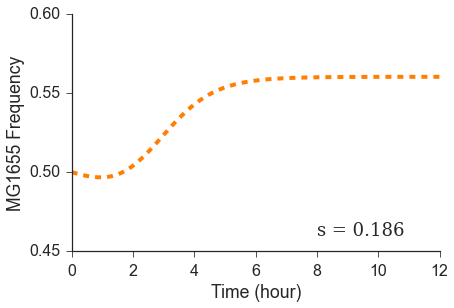

In [35]:
def plot_frequency(ax=None):
    if ax is None:
        fig,ax = plt.subplots(1, 1)
    else:
        fig = ax.get_figure()
    
    p = y[:,0] / y.sum(axis=1)
    ax.plot(t, p, color=winner_color, lw=4, ls='--')
    ax.text(8, 0.46, "s = %.3f" %  _s, {'size':18, 'family':'serif'})
    ax.set_xlabel('Time (hour)')
    ax.set_ylabel(winner + ' Frequency')
    ax.set_yticks([0.45,0.5,0.55,0.6])
    sns.despine()
    fig.tight_layout()
    return fig,ax
fig,ax = plot_frequency()
plt.savefig("frequency_%s.png" % context, bbox_inches='tight')

# Combined plot

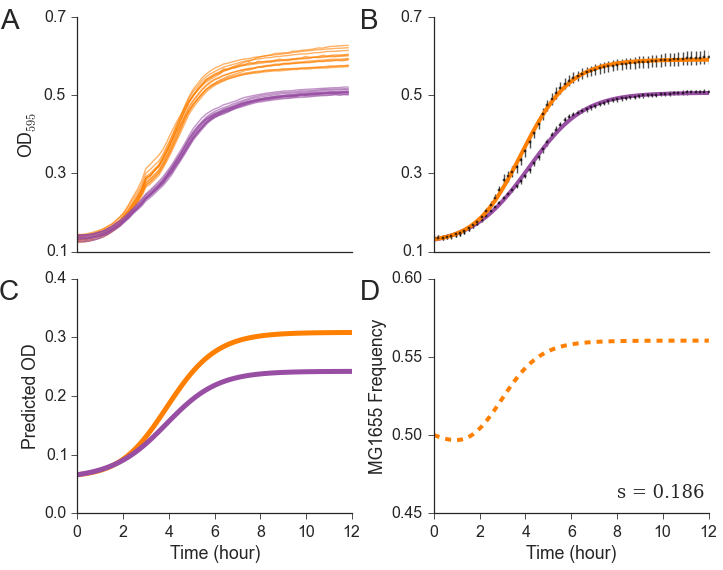

In [60]:
fig,ax = plt.subplots(2, 2, figsize=(10,8))
plot_growth_curves(ax[0,0])
plot_fit(ax[0,1])
plot_competition(ax[1,0])
plot_frequency(ax[1,1])

ax[0,0].set_xlabel('')
ax[0,0].set_xticks([])
ax[0,1].set_xlabel('')
ax[0,1].set_xticks([])
#ax[0,1].set_yticks([])
ax[0,1].set_ylabel('')
ax[0,0].get_legend().set_visible(False)
ax[1,0].get_legend().set_visible(False)
ax[0,1].get_legend().set_visible(False)

ax[0,0].annotate(s='A', xy=(0,0.95), xycoords="figure fraction", fontsize=28)
ax[0,0].annotate(s='B', xy=(0.5,0.95), xycoords="figure fraction", fontsize=28)
ax[0,0].annotate(s='C', xy=(0,0.475), xycoords="figure fraction", fontsize=28)
ax[0,0].annotate(s='D', xy=(0.5,0.475), xycoords="figure fraction", fontsize=28)

fig.tight_layout()
fig.savefig("combined.png")

In [46]:
plt.annotate(s='A', xytext=(-0.1,0.9), textcoords="figure fraction")